# Explorer notebook

### Imports

In [1]:
import os
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import pymysql


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [3]:
# Christian's notebook >> not needed for now
#import dash
#import dash_core_components as dcc
#import dash_html_components as html
#from dash.dependencies import Input, Output
#import plotly.graph_objs as go
#import dash_table

## CONSTANTS

In [80]:
LANGUAGES = ['fr', 'de', 'it', 'rm', 'en', 'lb']

### Connection to DB

In [11]:
# Connexion database
db_user = os.getenv('IMPRESSO_MYSQL_USER')
db_host = os.getenv('IMPRESSO_MYSQL_HOST')
db_name = os.getenv('IMPRESSO_MYSQL_DB')
db_password = os.getenv('IMPRESSO_MYSQL_PWD')
db_url = f'mysql://{db_user}:{db_password}@{db_host}/{db_name}?charset=utf8'
engine = create_engine(db_url, poolclass=NullPool)

In [12]:
print(os.environ)
print(db_user)

environ({'TERM_PROGRAM': 'Apple_Terminal', 'TERM': 'xterm-color', 'SHELL': '/bin/bash', 'TMPDIR': '/var/folders/k9/xsvz80bn7s9gt7_tkj2ng3h80000gn/T/', 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.fVUGp7pE96/Render', 'CONDA_SHLVL': '1', 'TERM_PROGRAM_VERSION': '421.2', 'CONDA_PROMPT_MODIFIER': '(env-impresso) ', 'TERM_SESSION_ID': 'B77D8729-8B5B-4735-989E-3985200F0D15', 'IMPRESSO_MYSQL_HOST': 'dhlabsrv27.epfl.ch', 'USER': 'justineweber', 'CONDA_EXE': '/anaconda3/bin/conda', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.ZKLo5b0pUR/Listeners', 'IMPRESSO_MYSQL_DB': 'impresso_dev', 'IMPRESSO_MYSQL_PWD': 'Chahsh7einohcecahDeK', 'IMPRESSO_MYSQL_USER': 'impr_lausanne_ro', '_CE_CONDA': '', 'PATH': '/anaconda3/envs/env-impresso/bin:/anaconda3/condabin:/anaconda3/bin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/opt/local/bin:/opt/local/sbin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/bin:/Library/TeX/texbin:/opt/X11/bin:/Applications/Wireshark.app/Contents/MacOS', 'COND

### Example from Christian

In [13]:
data = pd.read_sql('SELECT impresso.issues.id, impresso.issues.year, impresso.issues.month, impresso.issues.day, impresso.issues.newspaper_id, impresso.newspapers.title FROM impresso.issues, impresso.newspapers WHERE impresso.newspapers.id = impresso.issues.newspaper_id ORDER BY impresso.issues.year ASC, impresso.issues.month ASC, impresso.issues.day ASC', engine)


In [14]:
data.head()

,id,year,month,day,newspaper_id,title
0,EXP-1740-01-01-a,1740,1,1,EXP,L'Express
1,EXP-1740-01-29-a,1740,1,29,EXP,L'Express
2,EXP-1740-04-04-a,1740,4,4,EXP,L'Express
3,EXP-1740-07-14-a,1740,7,14,EXP,L'Express
4,NZZ-1780-01-12-a,1780,1,12,NZZ,Neue Zürcher Zeitung


In [8]:
data['datetime'] = pd.to_datetime(data.year*10000+data.month*100+data.day,format='%Y%m%d')


In [9]:
data.head()

,id,year,month,day,newspaper_id,title,datetime
0,EXP-1740-01-01-a,1740,1,1,EXP,L'Express,1740-01-01
1,EXP-1740-01-29-a,1740,1,29,EXP,L'Express,1740-01-29
2,EXP-1740-04-04-a,1740,4,4,EXP,L'Express,1740-04-04
3,EXP-1740-07-14-a,1740,7,14,EXP,L'Express,1740-07-14
4,NZZ-1780-01-12-a,1780,1,12,NZZ,Neue Zürcher Zeitung,1780-01-12


### Explorer

In [15]:
newspapers_df = pd.read_sql('SELECT * FROM impresso.newspapers;', engine)
issues_df = pd.read_sql('SELECT * FROM impresso.issues;', engine)

##### Export to CSV to work in case of connection issue

In [13]:
#newspapers_df.to_csv(r'../local-data/newspapers.csv')

In [14]:
#recover1 = pd.read_csv('../local-data/newspapers.csv', index_col=0)
#recover1.head()

In [15]:
#issues_df.to_csv(r'../local-data/issues.csv')

In [16]:
#recover2 = pd.read_csv('../local-data/issues.csv', index_col=0)
#recover2.head()

##### Explore

In [16]:
newspapers_df.head(5)

,id,title,start_year,end_year,availability_eta
0,,La Sentinelle,NaN,NaN,None
1,24HEURES,24Heures,1762.0,2018.0,None
2,actionfem,L'Action féminine,1927.0,1940.0,None
3,AMI,L’ami du peuple,1878.0,1922.0,None
4,armeteufel,Arme Teufel,1903.0,1929.0,None


In [17]:
issues_df.head(5)

,id,year,month,day,edition,access_rights,created,last_modified,is_damaged,s3_version,newspaper_id
0,actionfem-1927-10-15-a,1927,10,15,a,Closed,2019-06-15 12:22:38,NaT,0,,actionfem
1,actionfem-1927-11-15-a,1927,11,15,a,Closed,2019-06-15 12:22:38,NaT,0,,actionfem
2,actionfem-1927-12-15-a,1927,12,15,a,Closed,2019-06-15 12:22:38,NaT,0,,actionfem
3,actionfem-1928-01-15-a,1928,1,15,a,Closed,2019-06-15 12:22:41,NaT,0,,actionfem
4,actionfem-1928-02-15-a,1928,2,15,a,Closed,2019-06-15 12:22:41,NaT,0,,actionfem


### Number of newspaper issues by year/decade

#### By year

In [25]:
columns_group = ['newspaper_id', 'year']

In [26]:
issue_per_np_year = issues_df.groupby(columns_group).count()

In [27]:
nb_issue_per_np_year_id = issue_per_np_year['id']

In [28]:
# Check if all columns have the same number of lines
for col in issues_df.columns :
    if not col in columns_group and not nb_issue_per_np_year_id.equals(issue_per_np_year[col]) :
        print("Problem with column {} : not the same count number.".format(col))

Problem with column last_modified : not the same count number.


Column last_modified is often NaT, which is why the count is not the same. For that others we always have the same number so we can take any column (and we take 'id').

In [29]:
# convert to df in order to plot
nb_issue_per_np_year_id = nb_issue_per_np_year_id.reset_index(name='count')
nb_issue_per_np_year_id.head(5)

,newspaper_id,year,count
0,BDC,1839,23
1,CDV,1843,104
2,CDV,1844,98
3,CDV,1849,102
4,CDV,1850,105


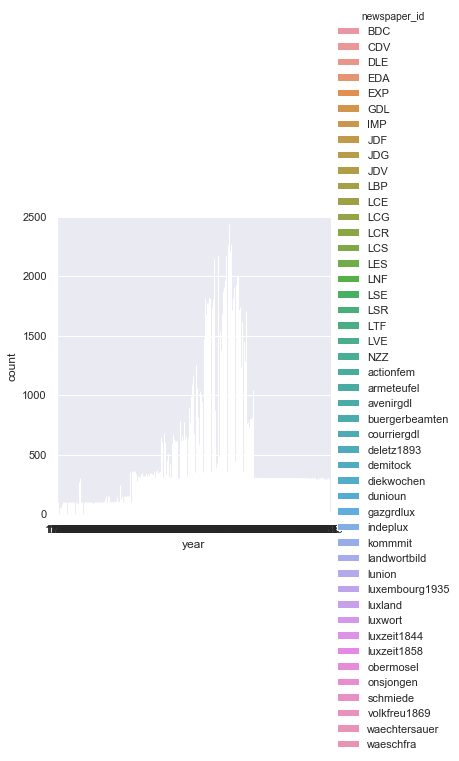

In [30]:
# Plot
sns.catplot(x="year", y="count", hue="newspaper_id", kind="bar", data=nb_issue_per_np_year_id)

#### By decade

#### Select language

In [75]:
newspapers_languages_df = pd.read_sql('SELECT * FROM newspapers_languages;', engine)
languages_df = pd.read_sql('SELECT * FROM languages;', engine)

In [76]:
newspapers_languages_df.head()

,newspaper_id,language_id
0,actionfem,2
1,armeteufel,2
2,avenirgdl,2
3,BAN,2
4,BLB,2


In [93]:
languages_df.head(100)

,id,code,lexvo_uri
0,1,n/a,None
1,2,de,None
2,3,fr,None
3,4,it,None
4,5,rm,None
5,6,en,None
6,7,lb,None


In [102]:
# TODO : finish this (returns empty df)
def np_by_language(language):
    #TODO: add checks on parameter language
    assert language in LANGUAGES, "Can't recognize selected languages. Please chose one among existing languages in db."
    
    # Find ID
    lang_id = languages_df.loc[languages_df['code']==language]['id'].at(0)
    print(lang_id)
    return newspapers_languages_df.loc[newspapers_languages_df['language_id']==lang_id]

In [103]:
np_by_language('fr')

,newspaper_id,language_id


#### Select NP

In [63]:
# Parameters of filter
columns_group = ['newspaper_id', 'decade']
newspapers_select = ['BDC', 'LCG', 'actionfem']

In [64]:
if newspapers_select:
    issues_df_decade = issues_df.loc[issues_df['newspaper_id'].isin(newspapers_select)]
else:
    issues_df_decade = issues_df

In [65]:
issues_df_decade.head()

,id,year,month,day,edition,access_rights,created,last_modified,is_damaged,s3_version,newspaper_id,decade
0,actionfem-1927-10-15-a,1927,10,15,a,Closed,2019-06-15 12:22:38,NaT,0,,actionfem,1920
1,actionfem-1927-11-15-a,1927,11,15,a,Closed,2019-06-15 12:22:38,NaT,0,,actionfem,1920
2,actionfem-1927-12-15-a,1927,12,15,a,Closed,2019-06-15 12:22:38,NaT,0,,actionfem,1920
3,actionfem-1928-01-15-a,1928,1,15,a,Closed,2019-06-15 12:22:41,NaT,0,,actionfem,1920
4,actionfem-1928-02-15-a,1928,2,15,a,Closed,2019-06-15 12:22:41,NaT,0,,actionfem,1920


In [66]:
# Create new decade column
issues_df_decade['decade'] = issues_df_decade.apply(lambda row: row.year-row.year%10, axis = 1) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
issue_per_np_decade = issues_df_decade.groupby(columns_group).count()

In [68]:
# convert to df in order to plot
nb_issue_per_np_decade_id = issue_per_np_decade['id']
nb_issue_per_np_decade_id = nb_issue_per_np_decade_id.reset_index(name='count')
nb_issue_per_np_decade_id.head(5)

,newspaper_id,decade,count
0,BDC,1830,23
1,LCG,1840,308
2,LCG,1850,1438
3,LCG,1860,1563
4,LCG,1870,1563


Remark : same check as above > only difference is with column last_modified

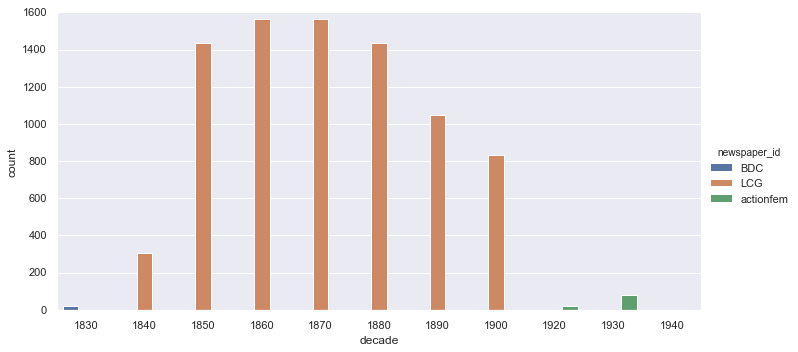

In [69]:
sns.catplot(x="decade", y="count", hue="newspaper_id", kind="bar", data=nb_issue_per_np_decade_id, height=5, aspect=2)

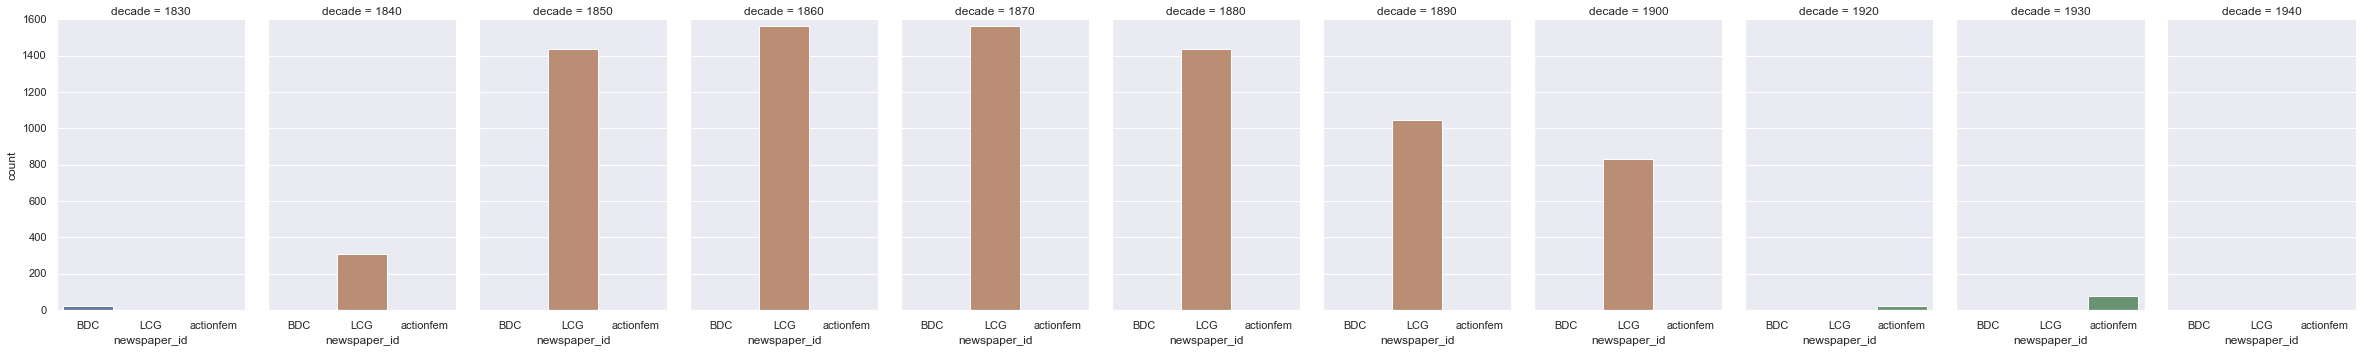

In [70]:
g = sns.catplot(x="newspaper_id", y="count", col="decade", data=nb_issue_per_np_decade_id,
                saturation=.5, kind="bar", ci=None, aspect=.6)

#### By provenance (CH/Lux)

By language (de, fr)